# Assignment 3 - Data Science - MBAN 6110 S
Submitted by Rupali Wadhawan (220189445)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/Users/rupaliwadhawan/Downloads/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


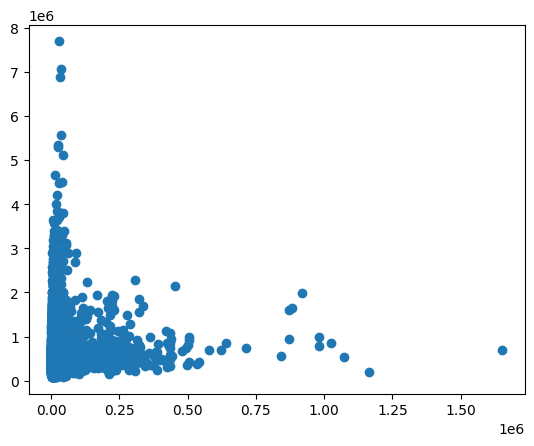

In [6]:
plt.scatter(df['sqft_lot'],df['price'])

In [7]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [8]:
from datetime import datetime
df['age'] = datetime.now().year - df['yr_built']

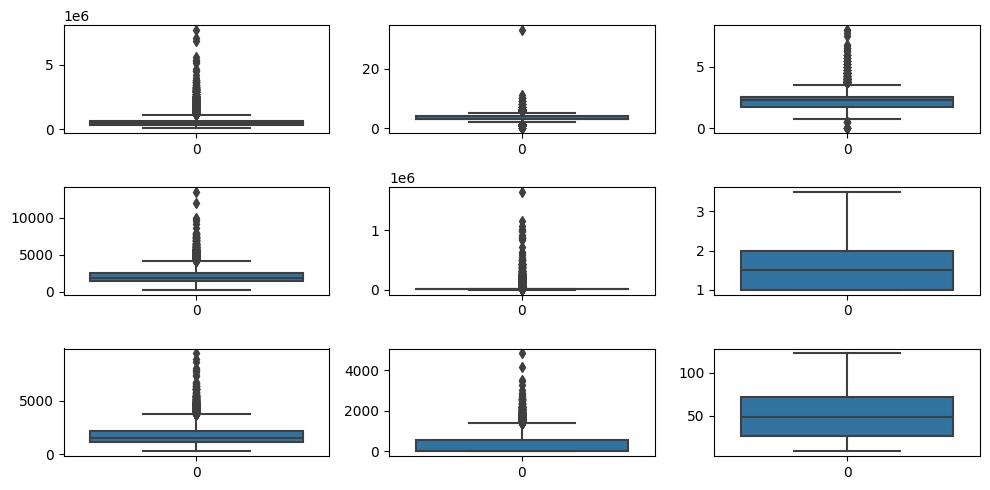

In [9]:
import seaborn as sns
fig, axs = plt.subplots(3,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['bedrooms'], ax = axs[0,1])
plt3 = sns.boxplot(df['bathrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['sqft_living'], ax = axs[1,0])
plt2 = sns.boxplot(df['sqft_lot'], ax = axs[1,1])
plt3 = sns.boxplot(df['floors'], ax = axs[1,2])
plt1 = sns.boxplot(df['sqft_above'],ax=axs[2,0])
plt2 = sns.boxplot(df['sqft_basement'],ax=axs[2,1])
plt3 = sns.boxplot(df['age'],ax=axs[2,2])
plt.tight_layout()

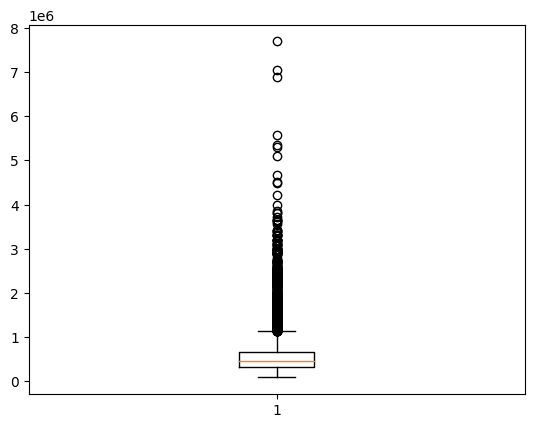

In [10]:
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

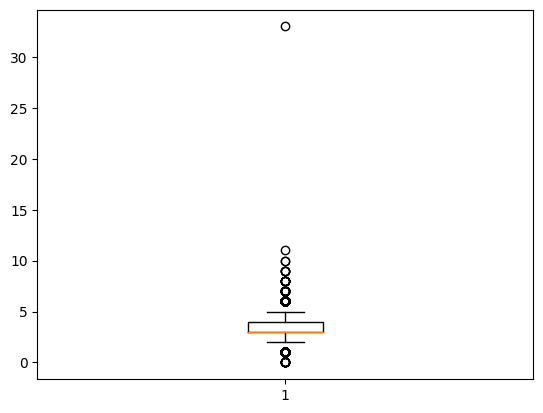

In [11]:
plt.boxplot(df.bedrooms)
Q1 = df.bedrooms.quantile(0.25)
Q3 = df.bedrooms.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.bedrooms >= Q1 - 1.5*IQR) & (df.bedrooms <= Q3 + 1.5*IQR)]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19980 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19980 non-null  int64  
 1   date           19980 non-null  object 
 2   price          19980 non-null  float64
 3   bedrooms       19980 non-null  int64  
 4   bathrooms      19980 non-null  float64
 5   sqft_living    19980 non-null  int64  
 6   sqft_lot       19980 non-null  int64  
 7   floors         19980 non-null  float64
 8   waterfront     19980 non-null  int64  
 9   view           19980 non-null  int64  
 10  condition      19980 non-null  int64  
 11  grade          19980 non-null  int64  
 12  sqft_above     19980 non-null  int64  
 13  sqft_basement  19980 non-null  int64  
 14  yr_built       19980 non-null  int64  
 15  yr_renovated   19980 non-null  int64  
 16  zipcode        19980 non-null  int64  
 17  lat            19980 non-null  float64
 18  long       

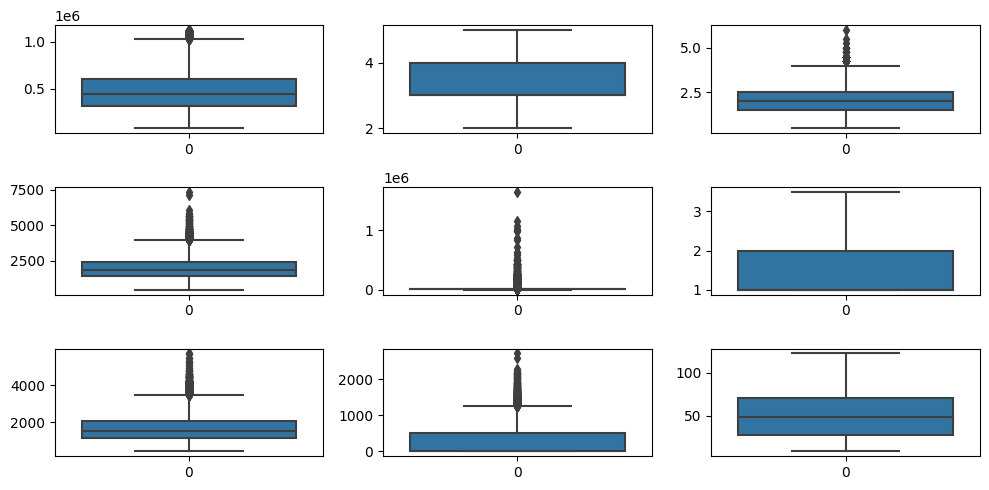

In [13]:
fig, axs = plt.subplots(3,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['bedrooms'], ax = axs[0,1])
plt3 = sns.boxplot(df['bathrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['sqft_living'], ax = axs[1,0])
plt2 = sns.boxplot(df['sqft_lot'], ax = axs[1,1])
plt3 = sns.boxplot(df['floors'], ax = axs[1,2])
plt1 = sns.boxplot(df['sqft_above'],ax=axs[2,0])
plt2 = sns.boxplot(df['sqft_basement'],ax=axs[2,1])
plt3 = sns.boxplot(df['age'],ax=axs[2,2])
plt.tight_layout()

In [14]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

In [15]:
df['total_sqft'] = df['sqft_living']+df['sqft_lot']

In [16]:
from datetime import datetime
df['age'] = datetime.now().year - df['yr_built']

In [17]:
df['date'] = pd.to_datetime(df['date'])

In [18]:
X = df.drop('price', axis=1)
y = df['price']

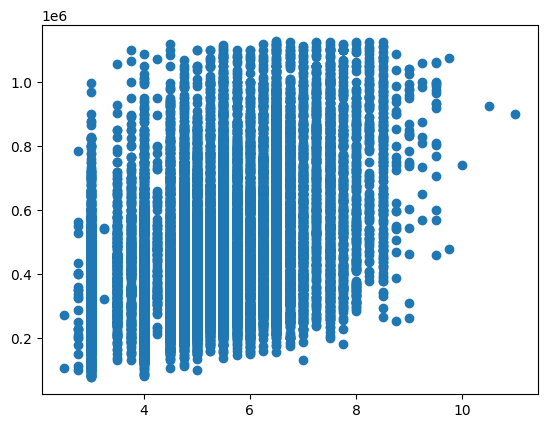

In [19]:
plt.scatter(df['total_rooms'],df['price'])

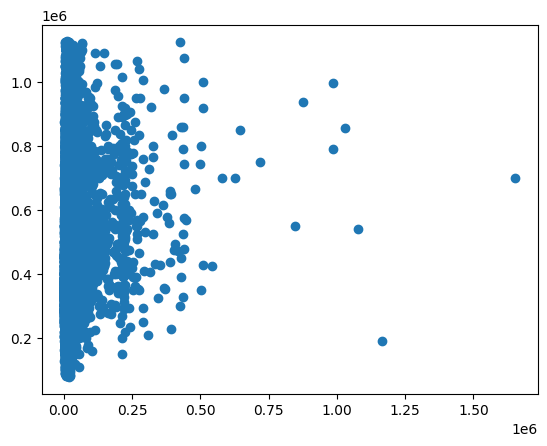

In [20]:
plt.scatter(df['total_sqft'],df['price'])

In [21]:
results = ols("price ~ total_rooms + age + view + grade", data=df).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     5442.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:48:58   Log-Likelihood:            -2.6560e+05
No. Observations:               19980   AIC:                         5.312e+05
Df Residuals:                   19975   BIC:                         5.313e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.705e+05   1.01e+04    -86.312      

In [22]:
"y_hat = -870500 + 31130*total_rooms + 2506.8734*age + 35720*view + 138500*grade"

'y_hat = -870500 + 31130*total_rooms + 2506.8734*age + 35720*view + 138500*grade'

In [23]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,total_rooms,total_sqft
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,68,4.0,6830


In [24]:

-870500 + 31130*4 + 2506.8734*68 + 35720*0 + 138500*7

393987.39119999995

In [25]:
pred_vals = results.predict(df[['total_rooms','age','view','grade']])

In [26]:
pred_vals

0        393837.739308
1        442780.372743
2        279373.635711
3        462165.339990
4        483233.108434
             ...      
21608    443647.948457
21609    462245.692940
21610    219551.433519
21611    456182.315693
21612    222058.306966
Length: 19980, dtype: float64

In [27]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [28]:
res

,y_hat,price
0,393837.739308,221900.0
1,442780.372743,538000.0
2,279373.635711,180000.0
3,462165.339990,604000.0
4,483233.108434,510000.0
...,...,...
21608,443647.948457,360000.0
21609,462245.692940,400000.0
21610,219551.433519,402101.0
21611,456182.315693,400000.0


In [29]:
res['error'] = res['y_hat'] - res['price']

In [30]:
res['sq_error'] = res['error']**2

In [31]:
np.sqrt(res['sq_error'].mean())

143559.17026383162

(array([9.000e+00, 4.000e+01, 2.220e+02, 1.018e+03, 3.518e+03, 7.482e+03,
        5.980e+03, 1.595e+03, 1.110e+02, 5.000e+00]),
 array([-776590.48082992, -639365.82507554, -502141.16932116,
        -364916.51356678, -227691.85781241,  -90467.20205803,
          46757.45369635,  183982.10945073,  321206.76520511,
         458431.42095949,  595656.07671386]),
 <BarContainer object of 10 artists>)

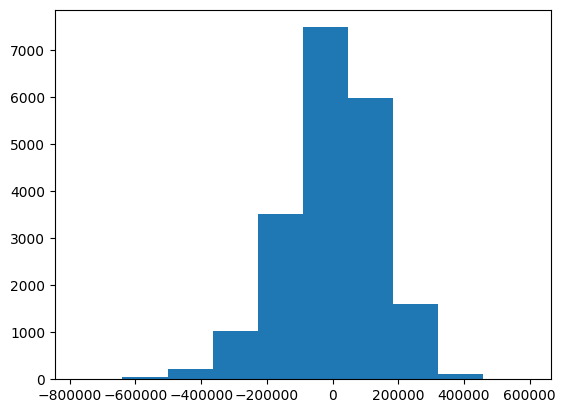

In [32]:
plt.hist(res['error'])

(array([ 482., 3350., 4372., 3825., 3004., 1921., 1394.,  852.,  519.,
         261.]),
 array([  78000.,  182900.,  287800.,  392700.,  497600.,  602500.,
         707400.,  812300.,  917200., 1022100., 1127000.]),
 <BarContainer object of 10 artists>)

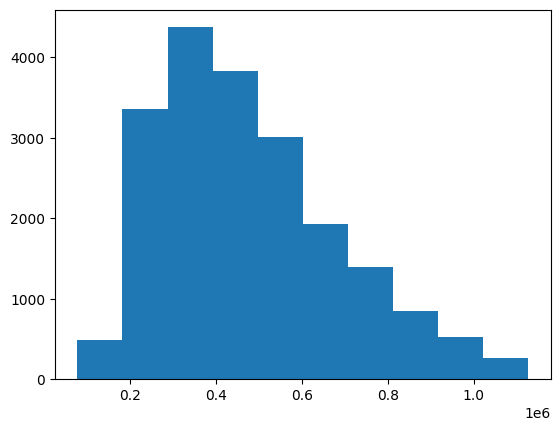

In [33]:
plt.hist(df['price'])

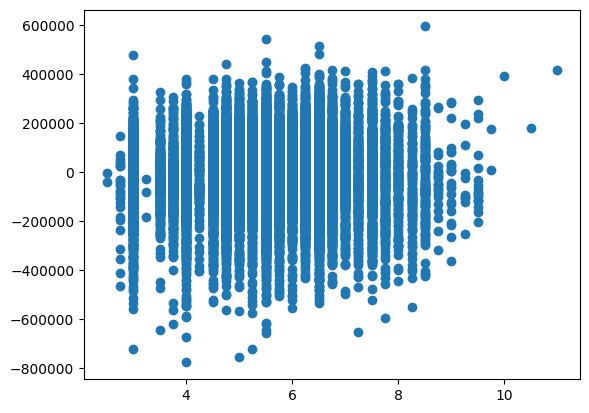

In [34]:
plt.scatter(df['total_rooms'],res['error'])

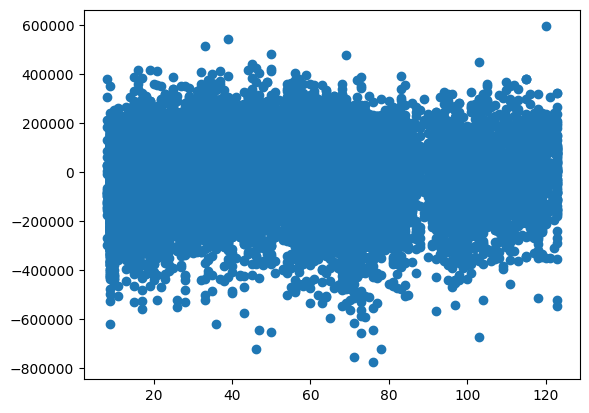

In [35]:
plt.scatter(df['age'],res['error'])

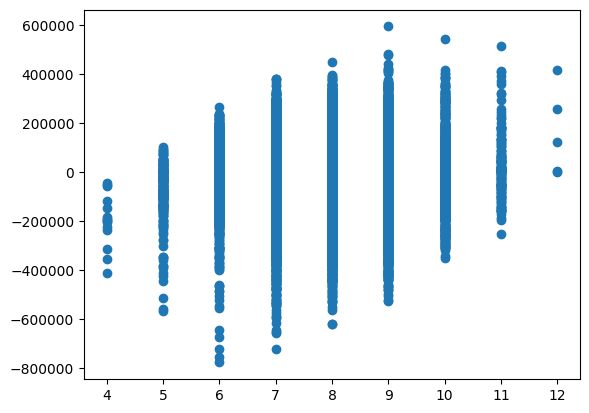

In [36]:
plt.scatter(df['grade'],res['error'])

((array([-3.97839205, -3.76221475, -3.64392316, ...,  3.64392316,
          3.76221475,  3.97839205]),
  array([-776590.48082992, -755992.73634754, -722398.33688038, ...,
          517860.27881245,  546185.78217035,  595656.07671386])),
 (142802.32082006088, -1.8430931835112844e-08, 0.994537794890153))

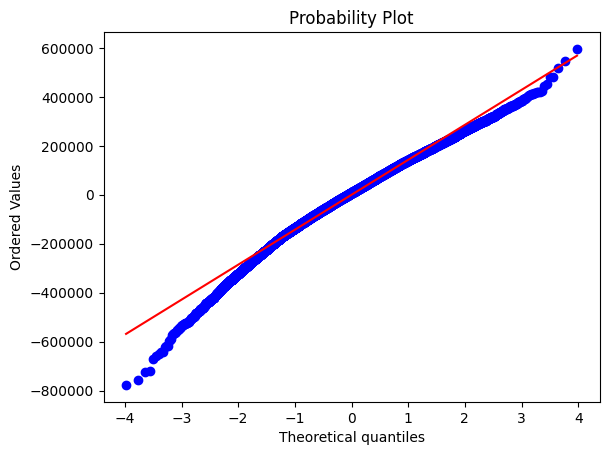

In [37]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [38]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_total_rooms   dfb_age  dfb_view  dfb_grade   
0          -0.003155         0.007344 -0.001629  0.001862  -0.001241  \
1           0.000349         0.001680  0.002814 -0.001374  -0.001370   
2          -0.004624         0.005443 -0.002156  0.000623   0.001861   
3           0.001315         0.013341  0.002576 -0.001880  -0.008376   
4           0.000094        -0.000931 -0.000613 -0.000327   0.000691   
...              ...              ...       ...       ...        ...   
21608      -0.002436         0.001705  0.005225  0.000517   0.000015   
21609      -0.001763        -0.001526  0.003917  0.000402   0.001463   
21610       0.018214        -0.022593 -0.020350  0.001576  -0.001450   
21611      -0.001262         0.001029  0.002943  0.000436  -0.000196   
21612       0.010133        -0.012698 -0.011267  0.000856  -0.000742   

            cooks_d  standard_resid  hat_diag  dffits_internal  student_resid   
0      3.177764e-05       -1.197595  0.000111        -

In [39]:
infl.summary_frame()

,dfb_Intercept,dfb_total_rooms,dfb_age,dfb_view,dfb_grade,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.003155,0.007344,-0.001629,0.001862,-0.001241,3.177764e-05,-1.197595,0.000111,-0.012605,-1.197608,-0.012605
1,0.000349,0.001680,0.002814,-0.001374,-0.001370,7.647999e-06,0.663224,0.000087,0.006184,0.663214,0.006184
2,-0.004624,0.005443,-0.002156,0.000623,0.001861,2.379797e-05,-0.692213,0.000248,-0.010908,-0.692204,-0.010908
3,0.001315,0.013341,0.002576,-0.001880,-0.008376,4.849805e-05,0.987987,0.000248,0.015572,0.987986,0.015572
4,0.000094,-0.000931,-0.000613,-0.000327,0.000691,6.651600e-07,0.186438,0.000096,0.001824,0.186433,0.001824
...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.002436,0.001705,0.005225,0.000517,0.000015,9.983347e-06,-0.582642,0.000147,-0.007065,-0.582633,-0.007065
21609,-0.001763,-0.001526,0.003917,0.000402,0.001463,6.658642e-06,-0.433573,0.000177,-0.005770,-0.433564,-0.005770
21610,0.018214,-0.022593,-0.020350,0.001576,-0.001450,1.750690e-04,1.271783,0.000541,0.029586,1.271803,0.029587
21611,-0.001262,0.001029,0.002943,0.000436,-0.000196,3.772551e-06,-0.391328,0.000123,-0.004343,-0.391320,-0.004343


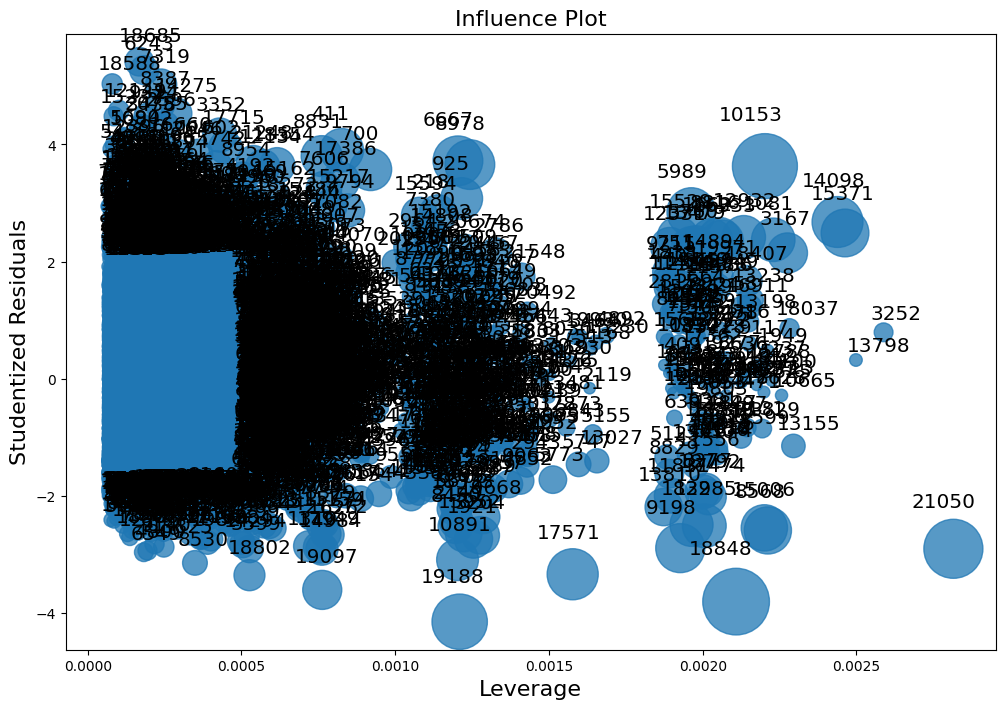

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [41]:
df.drop(10153, inplace=True)

In [42]:
df.drop(14098, inplace=True)

In [43]:
df.drop(15371, inplace=True)

In [44]:
results = ols("price ~ total_rooms + age + view + grade", data=df).fit()
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_total_rooms   dfb_age  dfb_view  dfb_grade   
0          -0.003158         0.007346 -0.001628  0.001848  -0.001238  \
1           0.000349         0.001681  0.002816 -0.001371  -0.001370   
2          -0.004622         0.005437 -0.002151  0.000603   0.001864   
3           0.001312         0.013344  0.002577 -0.001880  -0.008373   
4           0.000093        -0.000929 -0.000612 -0.000327   0.000690   
...              ...              ...       ...       ...        ...   
21608      -0.002436         0.001706  0.005229  0.000518   0.000014   
21609      -0.001763        -0.001528  0.003922  0.000404   0.001463   
21610       0.018259        -0.022646 -0.020399  0.001613  -0.001465   
21611      -0.001262         0.001030  0.002946  0.000437  -0.000197   
21612       0.010170        -0.012742 -0.011308  0.000878  -0.000751   

            cooks_d  standard_resid  hat_diag  dffits_internal  student_resid   
0      3.179638e-05       -1.197884  0.000111        -

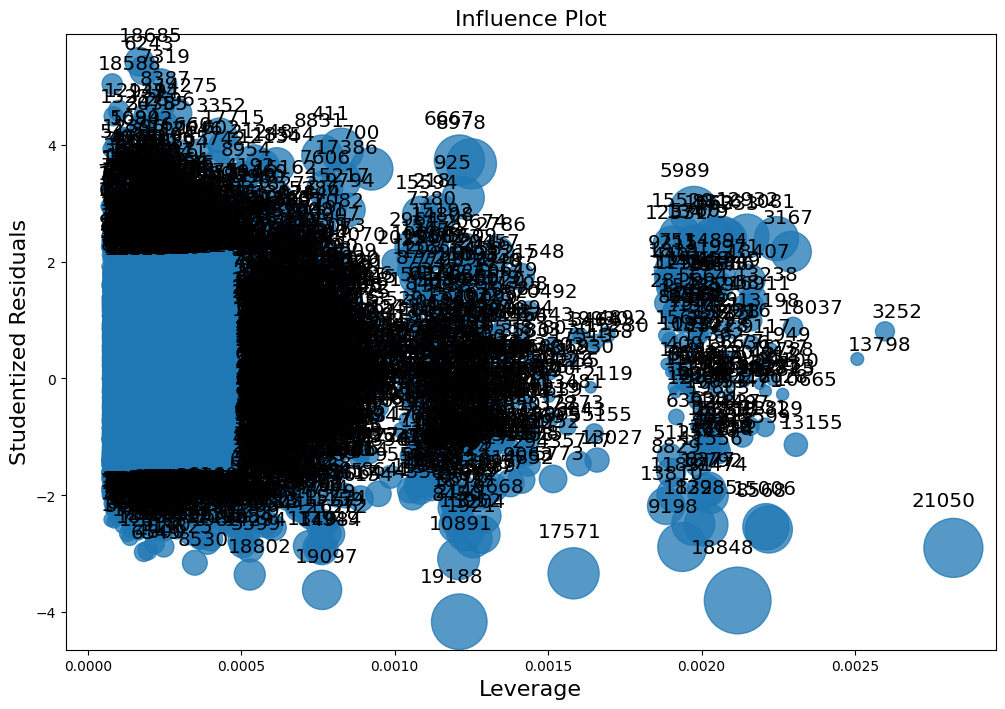

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [46]:
res

,y_hat,price,error,sq_error
0,393837.739308,221900.0,171937.739308,2.956259e+10
1,442780.372743,538000.0,-95219.627257,9.066777e+09
2,279373.635711,180000.0,99373.635711,9.875119e+09
3,462165.339990,604000.0,-141834.660010,2.011707e+10
4,483233.108434,510000.0,-26766.891566,7.164665e+08
...,...,...,...,...
21608,443647.948457,360000.0,83647.948457,6.996979e+09
21609,462245.692940,400000.0,62245.692940,3.874526e+09
21610,219551.433519,402101.0,-182549.566481,3.332434e+10
21611,456182.315693,400000.0,56182.315693,3.156453e+09


In [47]:
df['condition'].unique()

array([3, 5, 4, 1, 2])

In [48]:
dummies_view = pd.get_dummies(df.view, dtype=int)

In [49]:
dummies_view.rename(columns = {0: 'bad', 1:'below average',2:'average',3:'good',4:'great'}, inplace = True)

In [50]:
dummies_waterfront = pd.get_dummies(df.waterfront, dtype=int)
dummies_waterfront.rename(columns = {0: 'no waterfront', 1:'has a waterfront'}, inplace = True)

In [51]:
dummies_condition = pd.get_dummies(df.condition, dtype=int)
dummies_condition.rename(columns = {1: 'bad condition', 2:'below average condition', 3:'average condition',4:'good condition',5:'great condition'}, inplace = True)

In [52]:
dummies_grade = pd.get_dummies(df.grade, dtype=int)
dummies_grade.rename(columns = {1: 'worst', 2:'worse',3:'bad',4:'below avg',5:'avg',6:'above avg',7:'good',8:'better',9:'great',10:'amazing',11:'best'}, inplace = True)

In [53]:
df = pd.concat([df,dummies_view], axis=1)
df = pd.concat([df,dummies_waterfront], axis=1)

In [54]:
df = pd.concat([df,dummies_condition], axis=1)
df = pd.concat([df,dummies_grade], axis=1)


In [55]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,great condition,below avg,avg,above avg,good,better,great,amazing,best,12
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19977 entries, 0 to 21612
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       19977 non-null  int64         
 1   date                     19977 non-null  datetime64[ns]
 2   price                    19977 non-null  float64       
 3   bedrooms                 19977 non-null  int64         
 4   bathrooms                19977 non-null  float64       
 5   sqft_living              19977 non-null  int64         
 6   sqft_lot                 19977 non-null  int64         
 7   floors                   19977 non-null  float64       
 8   waterfront               19977 non-null  int64         
 9   view                     19977 non-null  int64         
 10  condition                19977 non-null  int64         
 11  grade                    19977 non-null  int64         
 12  sqft_above               19977 non-nu

In [57]:
daily_dataset = df.set_index('date').resample("H").agg({'total_rooms':'mean','age':'mean','price':'mean','grade':'mean', 'view':'mean','condition':'mean','sqft_living':'mean'}).ffill()

In [58]:
daily_dataset

,total_rooms,age,price,grade,view,condition,sqft_living
date,,,,,,,
2014-05-02 00:00:00,5.460938,47.8125,473044.53125,7.796875,0.171875,3.40625,2053.28125
2014-05-02 01:00:00,5.460938,47.8125,473044.53125,7.796875,0.171875,3.40625,2053.28125
2014-05-02 02:00:00,5.460938,47.8125,473044.53125,7.796875,0.171875,3.40625,2053.28125
2014-05-02 03:00:00,5.460938,47.8125,473044.53125,7.796875,0.171875,3.40625,2053.28125
2014-05-02 04:00:00,5.460938,47.8125,473044.53125,7.796875,0.171875,3.40625,2053.28125
...,...,...,...,...,...,...,...
2015-05-23 20:00:00,7.000000,63.0000,450000.00000,7.000000,0.000000,3.00000,1870.00000
2015-05-23 21:00:00,7.000000,63.0000,450000.00000,7.000000,0.000000,3.00000,1870.00000
2015-05-23 22:00:00,7.000000,63.0000,450000.00000,7.000000,0.000000,3.00000,1870.00000


In [61]:
results = ols("price ~ total_rooms + age + view + grade + sqft_living + condition", data=daily_dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     2404.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:53:35   Log-Likelihood:            -1.1323e+05
No. Observations:                9289   AIC:                         2.265e+05
Df Residuals:                    9282   BIC:                         2.265e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.476e+05   1.87e+04    -40.025      

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [63]:
# separate features and target
categorical_features = ['view','grade','condition']
numerical_features = ['age','total_rooms','sqft_living']
target = 'price'

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [65]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [66]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [67]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [68]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade',
                                                   'condition']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'total_rooms',
                                                   'sqft_living'])])),
                ('regressor', LinearRegression())])

In [69]:
pred = linear_regression.predict(X_test)

In [70]:
pred

array([657201.58831151, 465783.7253698 , 714468.91911631, ...,
       626650.31795183, 865788.42395495, 293333.0093219 ])

In [71]:
np.sqrt(mean_squared_error(pred,y_test))

139010.16342165484

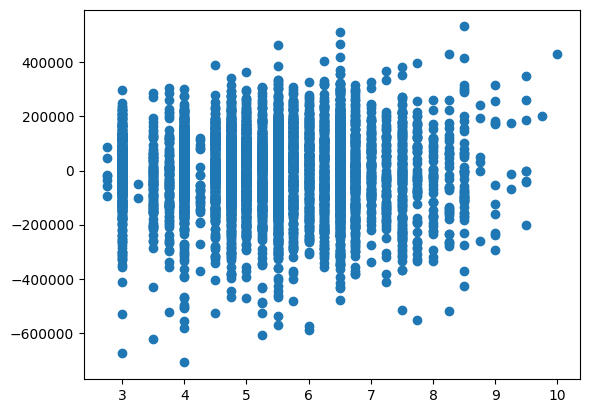

In [72]:
linear_pred_ = pd.concat([pd.DataFrame(pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
linear_pred_['res'] = linear_pred_['pred'] - linear_pred_['price']
plt.scatter(X_test['total_rooms'],linear_pred_['res'])

In [73]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [74]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade',
                                                   'condition']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'total_rooms',
                                                   'sqft_living'])])),
                ('regressor', Ridge(alpha=3.0))])

In [75]:
pred_ridge = ridge_regression.predict(X_test)

In [76]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

139095.73241103318

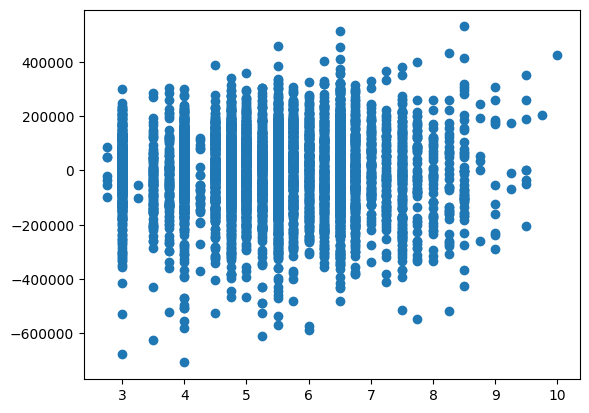

In [77]:
ridge_pred_ = pd.concat([pd.DataFrame(pred_ridge).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
ridge_pred_['res'] = ridge_pred_['pred'] - ridge_pred_['price']
plt.scatter(X_test['total_rooms'],ridge_pred_['res'])

In [78]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [79]:
lasso_regression.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727795168727.5625, tolerance: 60098715979.0173
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade',
                                                   'condition']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'total_rooms',
                                                   'sqft_living'])])),
                ('regressor', Lasso())])

In [80]:
lasso_pred = lasso_regression.predict(X_test)

In [81]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

139013.8057285806

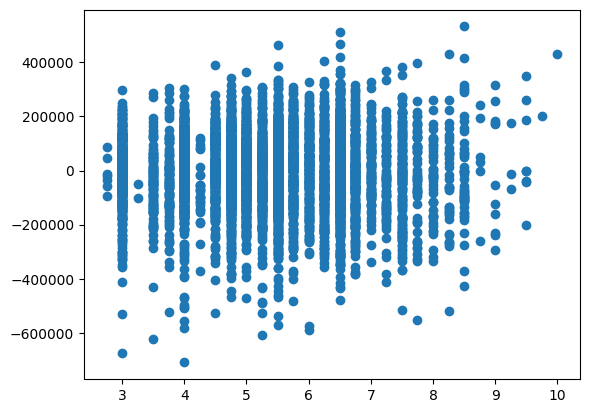

In [82]:
lasso_pred_ = pd.concat([pd.DataFrame(lasso_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
lasso_pred_['res'] = lasso_pred_['pred'] - lasso_pred_['price']
plt.scatter(X_test['total_rooms'],lasso_pred_['res'])

In [83]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [84]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade',
                                                   'condition']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'total_rooms',
                                                   'sqft_living'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [85]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [86]:
elasticnet_pred

array([613854.64591209, 486560.77953817, 635615.14171798, ...,
       536418.98568362, 759802.61768063, 313735.88434674])

In [87]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

154388.47460297425

(array([ 482., 3350., 4372., 3825., 3004., 1920., 1393.,  852.,  518.,
         261.]),
 array([  78000.,  182900.,  287800.,  392700.,  497600.,  602500.,
         707400.,  812300.,  917200., 1022100., 1127000.]),
 <BarContainer object of 10 artists>)

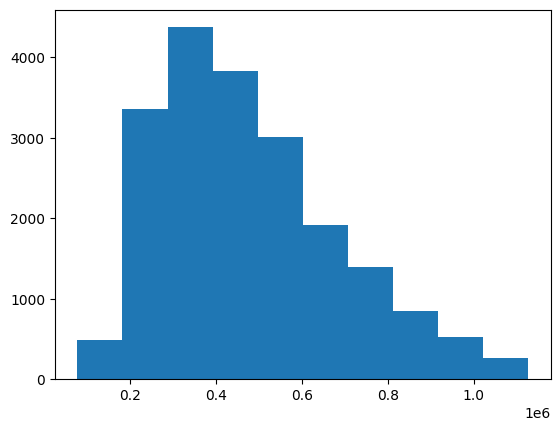

In [88]:
plt.hist(df['price'])

In [89]:
y_test

4475      670000.0
4080      450000.0
9920      535000.0
2604      525000.0
17253     387500.0
           ...    
17416     250000.0
8228      342888.0
6530      870000.0
235      1025000.0
961       385000.0
Name: price, Length: 5994, dtype: float64

In [90]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)

In [91]:
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['price']

In [92]:
X_test

,view,grade,condition,age,total_rooms,sqft_living
4475,0,9,3,18,6.00,2980
4080,0,8,3,19,5.50,2180
9920,0,8,3,117,5.75,2490
2604,0,7,5,56,5.00,1600
17253,0,6,3,81,5.00,1370
...,...,...,...,...,...,...
17416,0,6,5,81,4.00,1220
8228,0,6,4,75,3.00,790
6530,0,9,3,31,5.00,2320
235,0,10,3,40,9.00,3760


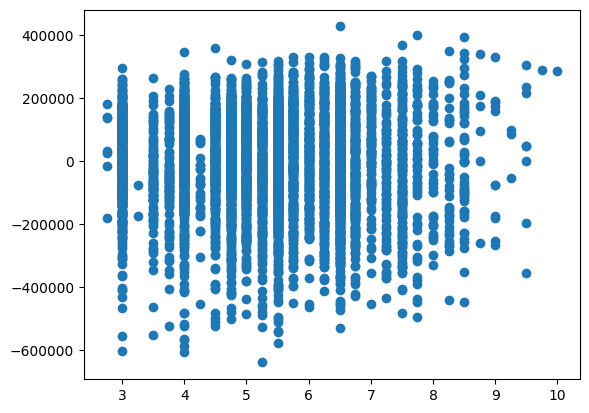

In [93]:
import matplotlib.pyplot as plt
plt.scatter(X_test['total_rooms'],elastic_net_pred['res'])

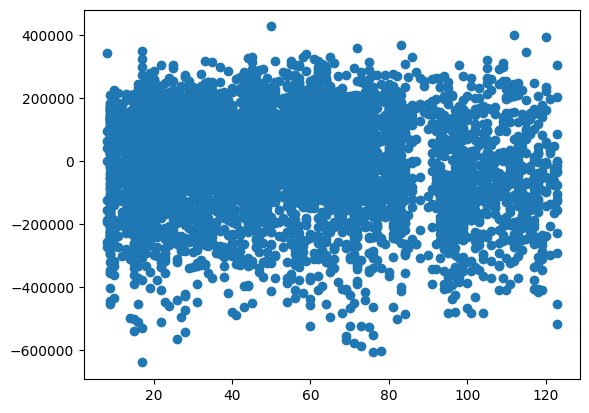

In [94]:
plt.scatter(X_test['age'],elastic_net_pred['res'])

In [95]:
input_data = pd.DataFrame({
    'total_rooms': [4],
    'view': [0],
    'grade': [7],
    'waterfront':[0],
    'age': [68],
    'condition':[3],
    'sqft_living':[1180]
})

In [96]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,great condition,below avg,avg,above avg,good,better,great,amazing,best,12
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [97]:
predicted_price = linear_regression.predict(input_data)

print("Predicted house price:", predicted_price)

Predicted house price: [366319.03559029]


In [109]:
df.columns[13]

'sqft_basement'

In [101]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,great condition,below avg,avg,above avg,good,better,great,amazing,best,12
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [103]:
linear_reg = linear_regression.named_steps['regressor']
coefficients = linear_reg.coef_
coefficients


array([ -63921.51060388,    -671.2001302 ,  -11855.49678451,
         -4215.26461697,   80663.47213586, -265699.49257119,
       -252739.13356671, -201202.16076477,  -99320.428985  ,
         20019.63051876,  143010.62642657,  226309.46332214,
        304627.53760682,  124993.95801327,  -41799.07073938,
        -48351.4743351 ,   17508.20545952,   18497.03521189,
         54145.30440326,   65423.72005413,    3411.28926914,
         66267.89331054])

# 1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net. You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction. Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.

I started with some feature engineering and outlier analysis as follows:
- derived the age of the house by subtracting the "yr_built" from today's date
- Created boxplots of each feature to identify outliers
- Since Price and Bedrooms had a lot of outliers and they were columns I wanted to use in my model, I removed outliers of Q1 and Q3 in both those columns
- combined bedrooms and bathrooms to make a column named "Total_rooms" to decrease columns
- combined sqft_living and sqft_lot to make a column named "total_sqft" to decrease columns
- changed the datatype of the "date" column from object to datetime
- Separated the price column (target) from the rest of the dataset 

Next, I built the following regression and regularization models - OLS, Linear Regression, Lasso, Ridge and ElasticNet.

- After checking for OLS, I performed residual analysis - one of the ways was an influence plot which showed a few high influence outliers. To ensure they do not skew the data, I dropped 3 of these high influence values. 

I chose this approach while keeping the assumptions of Linear Regression in mind. I wanted to ensure the columns I chose had a somewhat linear relationship with price while ensuring there was less multicollinearity.

# 2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

* *For OLS*: 
- I used the equation "price ~ total_rooms + age + view + grade" and got an R-squared value of 0.521 and MSE of 143559.17 and used it to predict values.
- To improve this model, I performed residual analysis with some plots 
    - scatterplots: Plots were mostly evenly underfitted and overfitted
    - influence plot: Plots showed a few high influence outliers which were dropped
    - Q-Q Plot: Plot showed it was quite accurate 
- I created dummy variables for the column "view" to improve the model even further
- I resampled the dataset to an hourly interval ("H") to get to a more granular level and the improved R-squared value came out to be 0.608
* *For Linear regression, lasso, Ridge and Elastic Net:*
- I split the data into categorical and numerical features and then into train and test data
- I standardized and oneHotEncoded this data
- Created a pipeline with preprocessing of this data using ColumnTransformer
- Applied the preprocessing pipeline and used to model to predict the data
- Derived Mean squared error for each model 
- Performed residual analysis for each model by plotting a scatter plot of "total_rooms" vs. residuals
- We can see that the scatterplot is now less underfitted and less overfitted.
Since the least MSE was for Linear Regression = 139010.163, we chose the Linear regression model. 

# 3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

We have conducted a comprehensive analysis to understand the main drivers of house prices in King City and their impact on the price. Our analysis involved several techniques and models, including Ordinary Least Squares (OLS) regression, Linear Regression, Lasso, Ridge, and Elastic Net. 

From the coefficients of OLS Linear regression, we can see how much and in what direction does a feature affect the price of the house. Grade and age have the highest and second highest coefficients respectively and thus, they affect the price of a house the most.  The negative coefficients show a inverse relationship with the price. These variables have a significant impact on the price of a house. For instance, an increase in the number of total_rooms, improvements in the view, and higher grades are likely to lead to higher house prices. On the other hand, as the age of a house increases, it tends to have a negative impact on its price.

To conclude, our findings suggest that the number of total rooms, age, view, and grade are crucial factors driving house prices in King City. By considering these factors, you can gain valuable insights into the market dynamics and make informed decisions regarding pricing and investment strategies.